# Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [8]:
import os
import shutil
import argparse
import glob
from random import randrange
from PIL import Image
import cv2
import numpy as np
from skimage import morphology
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage import exposure, img_as_float
import matplotlib.pyplot as plt

In [33]:
f='/home/cbologna/Dropbox/GitHub/models/research/deeplab/datasets/MESSIDOR/image2prime.tif'

In [38]:
#img_original = img_as_float(Image.open(f))
img_original = np.array(Image.open(f))

(array([6.719832e+06, 9.558570e+05, 8.062150e+05, 8.064440e+05,
        6.025460e+05, 5.882900e+04, 1.317000e+04, 1.818000e+04,
        1.265800e+04, 5.629000e+03]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

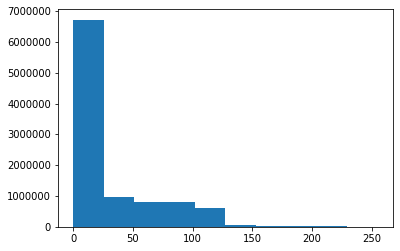

In [39]:
plt.hist(img_original.flatten())

In [44]:
img_adapteq = exposure.equalize_adapthist(img_original, clip_limit=0.04)

(array([5452404., 1979263.,  787986.,  624466.,  395263.,  311129.,
         223638.,  136749.,   65010.,   23452.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

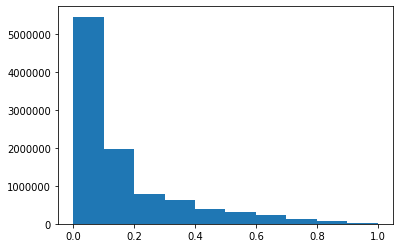

In [57]:
plt.hist(img_adapteq.flatten())

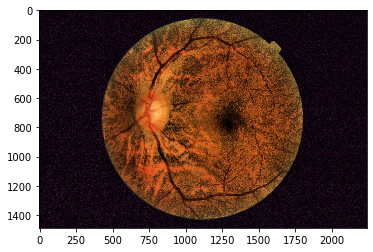

In [56]:
plt.imshow(img_adapteq)

In [48]:
#cv2.imwrite('/home/cbologna/Downloads/teste.jpg', img_adapteq)
Image.fromarray(img_adapteq.astype('uint8')).save('/home/cbologna/Downloads/teste.jpg')

In [51]:
im = Image.open('/home/cbologna/Downloads/teste.jpg')
im = np.array(im)

(array([      0.,       0.,       0.,       0.,       0., 9999360.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

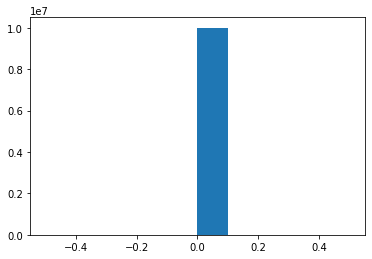

In [55]:
plt.hist(im.flatten())

In [3]:
target_filename = f.replace('prime', '-' + str(randrange(1, 6)))
#img_target = np.array(Image.open(target_filename))
img_target = img_as_float(Image.open(target_filename))

# Image Difference
img_diff = img_target - img_original

img_pb = img_diff.sum(2) # 3 channel to 1

img_pb[img_pb > 0] = 255

img_mask = img_pb == 255

# Fill Area
bg_pb = img_original.sum(2) # 3 channel to 1
bg_mask = bg_pb < 50

disk_mask = morphology.remove_small_holes(img_mask, img_mask.shape[0] * img_mask.shape[1] * 0.2) #Fill hole smaller than 20% os image

cup_mask = morphology.remove_small_holes(img_mask, np.sum(disk_mask) * 0.45)
cup_mask = morphology.remove_small_objects(cup_mask, np.sum(disk_mask) * 0.1)

rim_mask = disk_mask ^ cup_mask #Disk less Cup using XOR operator

eye_mask = np.invert(bg_mask) ^ disk_mask #Eye less Disk using XOR operator

'''
Stack RGB channels of each label follow this map:
Cup: RGB:(128,128,0) - Label: 0
Rim: RGB:(0,128,0) - Label: 1
Eye: RGB:(128,0,0) - Label: 2
Background: RGB:(0,0,0) - Label: 3
'''

img_segmentation = np.zeros(img_original.shape) # All is Background so far
img_segmentation[:,:,0] = (eye_mask | cup_mask) * 128 # Fill first layer with eye and cup mask following above map segmentation.
img_segmentation[:,:,1] = (rim_mask | cup_mask) * 128 # Fill second layer with rim and cup mask following above map segmentation.

im = Image.fromarray(img_segmentation.astype(np.uint8))

#img_segmentation = im.convert('RGB').convert('P', palette=palette)
img_segmentation = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=256)

ori_filename = target_filename.split('/')[-1].replace('tif', 'jpg')
seg_filename = target_filename.split('/')[-1].replace('tif', 'png')

if (np.sum(cup_mask) > 0) & (np.sum(rim_mask) > 0):
    # Save with PIL
    img_adapteq = exposure.equalize_adapthist(img_original, clip_limit=0.04)
    Image.fromarray(img_adapteq).save(f'{args.fullpath_JPEGDestination}/{ori_filename}')
    img_segmentation.save(f'{args.fullpath_destination}/{seg_filename}')
    # Save with cv2
    #cv2.imwrite(f'{args.fullpath_JPEGDestination}/{ori_filename}', img_original)
    #cv2.imwrite(f'{args.fullpath_destination}/{seg_filename}', np.array(img_segmentation))
else:
    print('Error on ' + f)

if idx % 50 == 0:
    print('converted', idx)


Error on /home/cbologna/Dropbox/GitHub/models/research/deeplab/datasets/MESSIDOR/image1-3.tif


NameError: name 'idx' is not defined

In [31]:
img_as_float(image)

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.01176471, 0

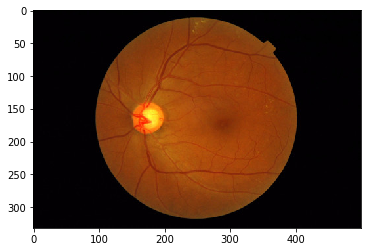

In [26]:
plt.imshow(image)

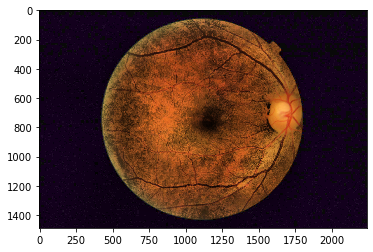

In [22]:
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.04)
plt.imshow(img_adapteq)